In [1]:
import numpy as np

from scipy.stats import norm

import matplotlib.pyplot as plt  # for plotting

# for improving the look of plots
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.style.use('seaborn-white')

In [2]:
mu = 0.1     # return / drift
sigma = 0.2  # volatiltiy

r = 0.01     # risk-free rate

T = 1        # terminal time
S0 = 10      # initial price

In [3]:
def SimPath(S0, mu, sigma, T, Ndt, Nsims):
    
    # time grid
    dt = T/(Ndt-1)
    t = np.linspace(0,T,Ndt)

    # real up tick probability
    p = 0.5*( 1 + (mu-sigma**2)/sigma*np.sqrt(dt) )   # real-world probability (P-measure)
    
    S = np.zeros((Nsims,Ndt))
    S[:,0] = S0
    
    for i in range(Ndt-1):
        
        # generate +1 with probabiltiy p, -1 with probability (1-p)
        x = 2*(np.random.rand(Nsims) < p) - 1
        
        # accumulate asset price
        S[:,i+1] = S[:,i] * np.exp(sigma*np.sqrt(dt)*x)

    return t, S

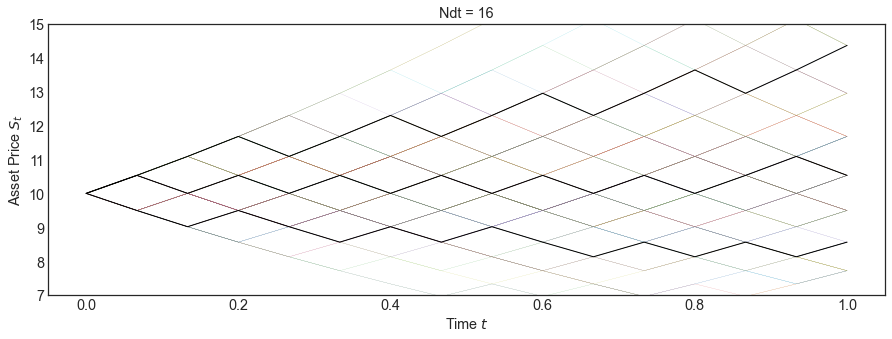

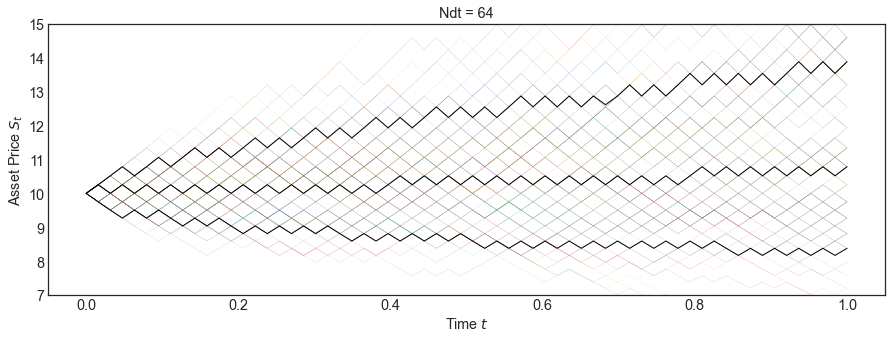

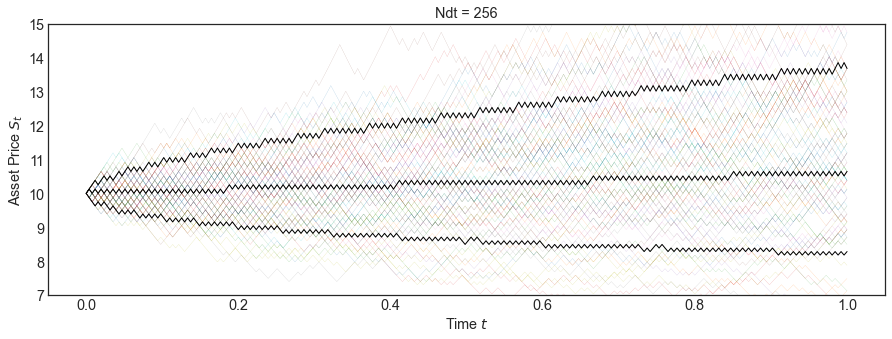

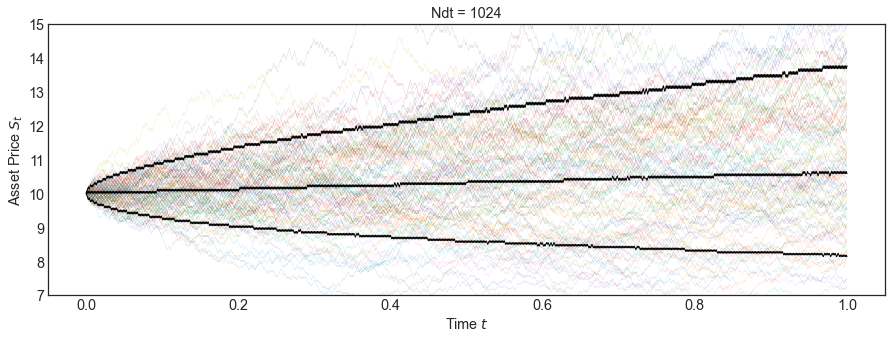

In [4]:
# generate sample paths with finer and finer grids -- i.e., with more and more time steps
Ndt = 2**(np.array([4,6,8,10]))
Nsims = 10000

for i in range(Ndt.shape[0]):
    
    t, S = SimPath(S0, mu, sigma, T, Ndt[i], Nsims)
    
    qtl = np.quantile(S,[0.1,0.5,0.9],axis=0).T
    
    plt.plot(t,S[:100,].T,linewidth=0.1)
    plt.plot(t,qtl,color='k',linewidth=1)
    plt.xlabel('Time $t$')
    plt.ylabel('Asset Price $S_t$')
    plt.title('Ndt = ' + str(Ndt[i]))
    plt.ylim([7,15])
    plt.show()

In [5]:
def LogNormalCDF(x, S0, mu, sigm, T):
    
    return norm.cdf( (np.log(x/S0)-(mu-0.5*sigma**2)*T)/(sigma*np.sqrt(T)) )


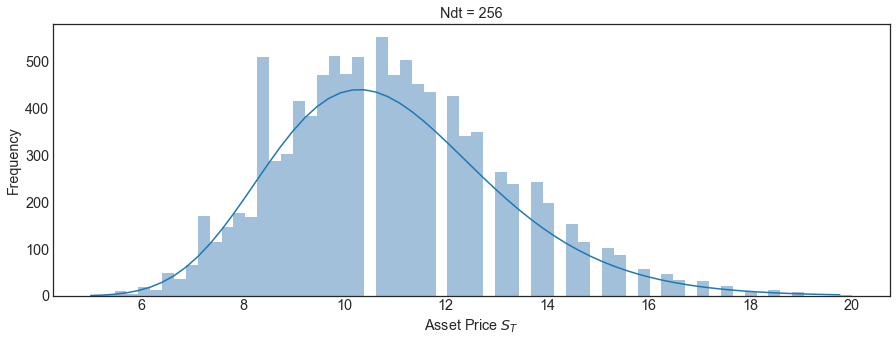

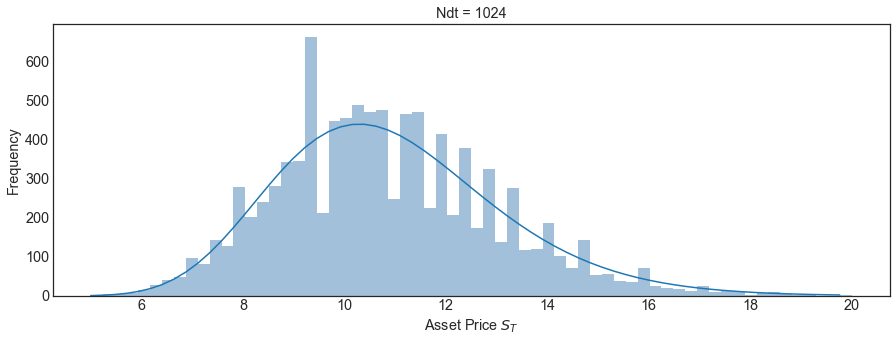

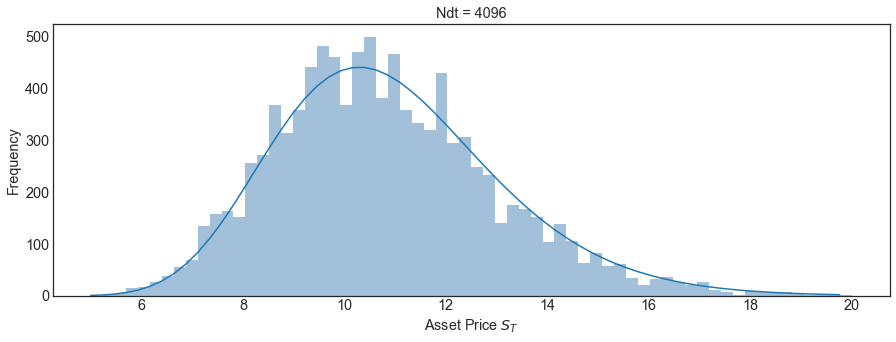

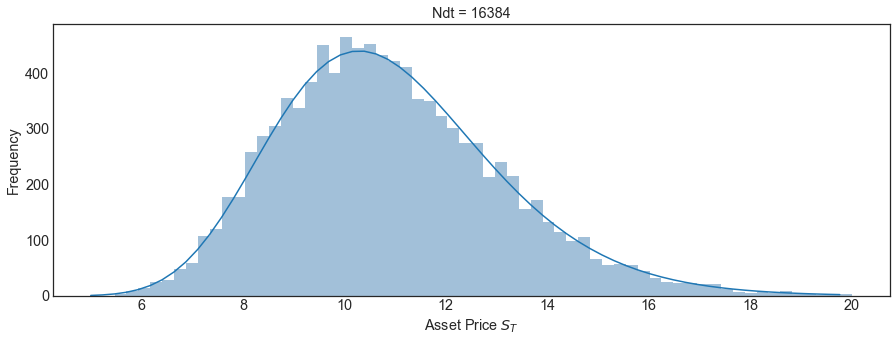

In [6]:
# generate terminal histograms and compare with exact formula
Ndt = 2**(np.array([8,10,12, 14]))
Nsims = 10000

for i in range(Ndt.shape[0]):
    
    t, S = SimPath(S0, mu, sigma, T, Ndt[i], Nsims)
    
    hist_bins = np.linspace(5,20,2**6+1)
    
    exact = Nsims*(LogNormalCDF(hist_bins[1:], S0, mu, sigma,T) - LogNormalCDF(hist_bins[:-1], S0, mu, sigma,T))
    
    plt.hist(S[:,-1], bins=hist_bins, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
    plt.plot(hist_bins[:-1], exact)
    plt.ylabel('Frequency')
    plt.xlabel('Asset Price $S_T$')
    plt.title('Ndt = ' + str(Ndt[i]))
    plt.show()